<a href="https://colab.research.google.com/github/eunsun53/ML_proj/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5track_%EC%B6%94%EC%B2%9C%EC%8B%9C%EC%8A%A4%ED%85%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#드라이브-코랩 연동 
from google.colab import drive 
drive.mount('/content/gdrive/')


Mounted at /content/gdrive/


In [4]:
cd /content/gdrive/MyDrive/dataset/movie_data

/content/gdrive/MyDrive/dataset/movie_data


In [5]:
!unzip movie_data.zip

Archive:  movie_data.zip
  inflating: tmdb_5000_credits.csv   
  inflating: tmdb_5000_movies.csv    


In [8]:
ls

movie_data.zip  tmdb_5000_credits.csv  tmdb_5000_movies.csv


In [6]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [9]:
df1 = pd.read_csv('./tmdb_5000_credits.csv')
df2 = pd.read_csv('./tmdb_5000_movies.csv')

In [10]:
df1.head(3)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [11]:
df2.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [13]:
df2.shape

(4803, 20)

In [15]:
df1.columns = ['id', 'title', 'cast', 'crew']
df2 = df2.merge(df1, on = 'id') # 'id를 교집합으로 병합'
df2.shape

(4803, 26)

In [16]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,tagline,title_x,vote_average,vote_count,title_y,cast_x,crew_x,title,cast_y,crew_y
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# **Demographic Filtering** -
   Before getting started with this  -
* we need a metric to score or rate movie 
* Calculate the score for every movie 
* Sort the scores and recommend the best rated movie to the users.

We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes.
So, I'll be using IMDB's weighted rating (wr) which is given as :-

![](https://image.ibb.co/jYWZp9/wr.png)
where,
* v is the number of votes for the movie;
* m is the minimum votes required to be listed in the chart;
* R is the average rating of the movie; And
* C is the mean vote across the whole report

We already have v(**vote_count**) and R (**vote_average**) and C can be calculated as 

In [17]:
# vote_average, vote_count 투표 지표 
C = df2['vote_average'].mean()
C # 모든 영화에 대한 전체 평균 

6.092171559442016

In [19]:
# 90% 이상의 투표를 받은 영화들만 추천함
m = df2['vote_count'].quantile(0.9) 
m

1838.4000000000015

In [20]:
q_movies = df2.copy().loc[df2['vote_count']>=m]

In [22]:
q_movies.shape

(481, 26)

In [24]:
def weighted_rating(x, m=m, C=C):
  V = x['vote_count'] 
  R = x['vote_average']

  return (V/(V+m)*R) + (m/(m+V)*C)


In [27]:
q_movies['score'] = q_movies.apply(weighted_rating, axis = 1) # 각 데이터를 weighted 함수를 적용한 scroe 열 추가 
q_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,title_x,vote_average,vote_count,title_y,cast_x,crew_x,title,cast_y,crew_y,score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.050669
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.665696
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.239396
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.346721
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.096368


In [31]:
# score 항목 기준으로 내림차순 정렬
q_movies = q_movies.sort_values('score', ascending= False)
q_movies[['title_x','vote_count', 'vote_average', 'score']].head()

,title_x,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239


<인기 높은 순으로 추천>

Text(0.5, 1.0, 'popular movies')

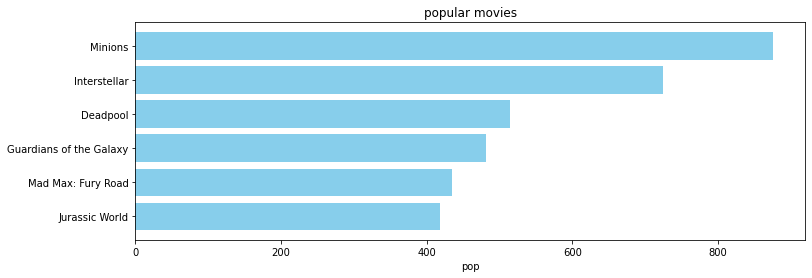

In [38]:
pop = df2.sort_values('popularity', ascending = False)

plt.figure(figsize = (12,4))
plt.barh(pop['title_x'].head(6), pop['popularity'].head(6), align = 'center', color = 'skyblue') #수평막대 그리기 
plt.gca().invert_yaxis()
plt.xlabel('pop')
plt.title("popular movies")

# **Content Based Filtering**
In this recommender system the content of the movie (overview, cast, crew, keyword, tagline etc) is used to find its similarity with other movies. Then the movies that are most likely to be similar are recommended.

![](https://image.ibb.co/f6mDXU/conten.png)

In [39]:
df2['overview'].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [42]:
df2['overview'].shape

(4803,)

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer # 문서를 tf-idf의 단어 벡터로 변환(인코딩)

tfidf = TfidfVectorizer(stop_words = 'english') # 불용어 지정 가능 

df2['overview'] = df2['overview'].fillna('') # NaN -> '' 로 변경 

tfidf.fit(df2['overview']) # 문장 데이터를 단어 집합으로 생성함 
tfidf.vocabulary_

{'22nd': 225,
 'century': 3232,
 'paraplegic': 13680,
 'marine': 11667,
 'dispatched': 5519,
 'moon': 12411,
 'pandora': 13644,
 'unique': 19671,
 'mission': 12269,
 'torn': 19054,
 'following': 7414,
 'orders': 13355,
 'protecting': 14754,
 'alien': 795,
 'civilization': 3545,
 'captain': 2999,
 'barbossa': 1733,
 'long': 11220,
 'believed': 1951,
 'dead': 4854,
 'come': 3843,
 'life': 11025,
 'headed': 8674,
 'edge': 6069,
 'earth': 6016,
 'turner': 19418,
 'elizabeth': 6188,
 'swann': 18376,
 'quite': 14969,
 'cryptic': 4588,
 'message': 12051,
 'bond': 2353,
 'past': 13749,
 'sends': 16695,
 'trail': 19141,
 'uncover': 19550,
 'sinister': 17127,
 'organization': 13364,
 'battles': 1824,
 'political': 14308,
 'forces': 7442,
 'secret': 16611,
 'service': 16753,
 'alive': 806,
 'peels': 13845,
 'layers': 10854,
 'deceit': 4909,
 'reveal': 15769,
 'terrible': 18739,
 'truth': 19371,
 'spectre': 17578,
 'death': 4878,
 'district': 5573,
 'attorney': 1439,
 'harvey': 8608,
 'dent': 5109

In [60]:
len(tfidf.vocabulary_)

20978

In [61]:
tfidf_matrix = tfidf.fit_transform(df2['overview'], ) # fit_transform: 데이터로 학습하여 단어 집합으로 인코딩한 뒤, 벡터 형태로 변환 
tfidf_matrix.shape # 각 문장- 단어 집합 벡터 값 = (4803, 20978)

(4803, 20978)

In [62]:
# 코사인 유사도로 벡터간의 유사도 측정 
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity # cosine_similrarities() 와 같은 역할 수행 

#cosine_sim1 = cosine_similarity(tfidf_matrix, tfidf_matrix)
#cosine_sim2 = cosine_similarity(tfidf_matrix) 
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [65]:
#cosine_sim1.shape


(4803, 4803)

In [66]:
#cosine_sim2.shape

(4803, 4803)

In [67]:
#cosine_sim1 == cosine_sim2

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [46]:
indices = pd.Series(df2.index, index = df2['title_x']).drop_duplicates() # 중복데이터 제거 
indices

title_x
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [50]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    print(sim_scores)
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['title_x'].iloc[movie_indices]

In [51]:
get_recommendations('The Dark Knight Rises') #content-based recommandation 

[(0, 0.0249951158376727), (1, 0.0), (2, 0.0), (3, 1.0), (4, 0.010433403719159354), (5, 0.0051446018158107934), (6, 0.01260063243546246), (7, 0.026954270578912674), (8, 0.02065221688538951), (9, 0.1337400906655523), (10, 0.0), (11, 0.0), (12, 0.0), (13, 0.0), (14, 0.0), (15, 0.004071333922512107), (16, 0.021121093874993183), (17, 0.0), (18, 0.006768893195007471), (19, 0.010765175685064708), (20, 0.007178266390761152), (21, 0.033380775071488206), (22, 0.0), (23, 0.0), (24, 0.019238168304196293), (25, 0.017013388161368177), (26, 0.018845673291717265), (27, 0.0), (28, 0.008351231142809445), (29, 0.02582248131068942), (30, 0.017549884233472455), (31, 0.029947529512076927), (32, 0.021708602796233892), (33, 0.0), (34, 0.0), (35, 0.0), (36, 0.028418448812136628), (37, 0.0), (38, 0.030631547964966054), (39, 0.01088522587631032), (40, 0.0), (41, 0.021109848007927), (42, 0.008087287409335878), (43, 0.0), (44, 0.0), (45, 0.008667206203132952), (46, 0.0), (47, 0.008370116577193958), (48, 0.0), (49,

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title_x, dtype: object